 Application to PyRat Datasets (Convolutional neural network)
--


Convolutional neural networks were inspired by biological processes in which the connectivity pattern between neurons is inspired by the organization of the animal visual cortex.

In [34]:
#import 
import numpy as np
import ast
import os
x = np.load("dataset_cnn.npz")['x']
y = np.load("dataset_cnn.npz")['y']
print(x.shape, y.shape)

(1000, 315) (1000,)


We create here train and test datasets


In [35]:
from sklearn.model_selection import train_test_split

#### CELL TO BE COMPLETED 

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)
print(x_train.shape, x_test.shape)

(800, 315) (200, 315)


In [36]:
'''Trains a simple convnet on the MNIST dataset.

Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''

#keras
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size =30
num_classes = 3
epochs = 3

# input image dimensions
img_rows, img_cols = 21, 15

x_train = x_train.reshape(-1,21,15,1)
x_test = x_test.reshape(-1,21,15,1)
input_shape = (21,15,1)

print(x_train.shape,y_train.shape)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(30, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(60, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
print(model.summary())
print(x_train.shape)
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


(800, 21, 15, 1) (800,)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 19, 13, 30)        300       
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 17, 11, 60)        16260     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 8, 5, 60)          0         
_________________________________________________________________
flatten_17 (Flatten)         (None, 2400)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 3)                 7203      
Total params: 23,763
Trainable params: 23,763
Non-trainable params: 0
_________________________________________________________________
None
(800, 21, 15, 1)
Train on 800 samples, validate on 200 samples
Epoch 1/3
800/800 [===========================

In [37]:
#import 

x = np.load("dataset_cnn_10000.npz")['x']
y = np.load("dataset_cnn_10000.npz")['y']
print(x.shape, y.shape)


(10000, 315) (10000,)


Test avec 10000 echantillons

In [55]:
# input image dimensions
def cnn(batch_size,epochs,x_train, x_test, y_train, y_test,num_classes = 3):
    img_rows, img_cols = 21, 15

    x_train = x_train.reshape(-1,21,15,1)
    x_test = x_test.reshape(-1,21,15,1)
    input_shape = (21,15,1)

    print(x_train.shape,y_train.shape)

    # convert class vectors to binary class matrices
    y_train = keras.utils.to_categorical(y_train, num_classes)
    y_test = keras.utils.to_categorical(y_test, num_classes)

    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])
    #print(model.summary())
    #print(x_train.shape)
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(x_test, y_test))
    score = model.evaluate(x_test, y_test, verbose=0)
    score_train = model.evaluate(x_train, y_train, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    return (score[1],score_train[1])


(8000, 315) (2000, 315)
(8000, 21, 15, 1) (8000,)
Train on 8000 samples, validate on 2000 samples
Epoch 1/1
8000/8000 [==============================] - 12s 1ms/step - loss: 0.9597 - acc: 0.5279 - val_loss: 0.9277 - val_acc: 0.5560
Test loss: 0.927748324394226
Test accuracy: 0.556
(8000, 21, 15, 1) (8000,)
Train on 8000 samples, validate on 2000 samples
Epoch 1/2
8000/8000 [==============================] - 13s 2ms/step - loss: 0.9559 - acc: 0.5384 - val_loss: 0.9258 - val_acc: 0.5670
Epoch 2/2
8000/8000 [==============================] - 11s 1ms/step - loss: 0.9232 - acc: 0.5708 - val_loss: 0.9322 - val_acc: 0.5635
Test loss: 0.9321687088012696
Test accuracy: 0.5635
(8000, 21, 15, 1) (8000,)
Train on 8000 samples, validate on 2000 samples
Epoch 1/3
8000/8000 [==============================] - 13s 2ms/step - loss: 0.9587 - acc: 0.5244 - val_loss: 0.9418 - val_acc: 0.5460
Epoch 2/3
8000/8000 [==============================] - 10s 1ms/step - loss: 0.9246 - acc: 0.5671 - val_loss: 0.9238 

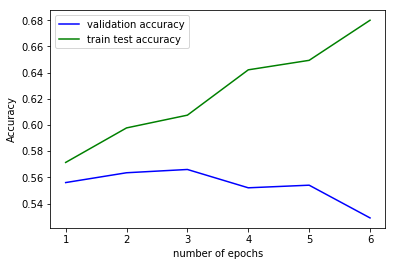

In [57]:
import matplotlib.pyplot as plt 
%matplotlib inline 


batch_size =20
num_classes = 3
epochs = 10
scorelist=[]
score_trainlist=[]
epochlist=[1,2,3,4,5,6]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)
print(x_train.shape, x_test.shape)
for i in epochlist:
    a=cnn(batch_size,i,x_train, x_test, y_train, y_test,num_classes = 3)
    scorelist.append(a[0])
    score_trainlist.append(a[1])
    
plt.plot(epochlist,scorelist,color="blue",label="validation accuracy")
plt.plot(epochlist,score_trainlist,color="green",label="train test accuracy")
plt.xlabel("number of epochs")
plt.ylabel("Accuracy")
plt.legend()